<a href="https://colab.research.google.com/github/groda/big_data/blob/master/PySpark_On_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/groda/big_data"><div><img src="https://github.com/groda/big_data/blob/master/logo_bdb.png?raw=true" align=right width="90" alt="Logo Big Data for Beginners"></div></a>
# PySpark on Google Colab


In this notebook we are going to explore the inner workings of PySpark and also see how PySpark integrates with Google Colaboratory.

We will utilize the PySpark distribution provided by `pip` and make use of the integrated Spark engine. The Spark coming with the PySpark distribution has its limitations as it runs as a single Java virtual machine in _pseudo-distributed mode_ and does not allow for customizations but it is practical for learning purposes.

This tutorial aims to offer a rich and engaging learning experience, not just by presenting solutions but also by elucidating the thought processes and methodologies employed in constructing these solutions.

⚠️ **Warning:** this notebook contains a blocking cell (in ["How to input commands in the `pyspark` shell"](#blocking-cell)) so if you wish to run all cells in the notebook (from the menu Runtime/Run all) this cell needs to be unblocked (by stopping it) or commented out.

>[PySpark on Google Colab](#scrollTo=2z9dWMmo-hji)

>[What is PySpark?](#scrollTo=SmIf2KmNVN6I)

>[Install PySpark](#scrollTo=_estSoYU5GEe)

>>[Check for Java ≥ 8](#scrollTo=oU0L_TEgEFB5)

>[Hello, World!](#scrollTo=Xga0fPbhAm7V)

>>[Run the "Hello, World" app](#scrollTo=aR1hERFyCQsS)

>>[Where do all these log messages come from?](#scrollTo=qi95QG0_efzl)

>>[Why did the "Hello, World!" app take so long?](#scrollTo=J-hZaCKsfz77)

>>[How long did the app actually run?](#scrollTo=J-hZaCKsfz77)

>[Where can I find Spark examples?](#scrollTo=Zh0y3WyAX3qb)

>>[examples directory structure](#scrollTo=zdlBTkbygvQo)

>>[List all examples](#scrollTo=kAFz47oTg14u)

>[Wordcount](#scrollTo=xZnvstDc3cwV)

>>[Datasets included in the Spark distribution](#scrollTo=MzdaeEwxisaV)

>>[Run the Wordcount app](#scrollTo=fxkQi8cyjcId)

>[How to set logging level](#scrollTo=PybOxVB8ATR1)

>>[Create log4j2.properties file](#scrollTo=pGl2RySI0XJH)

>>[Re-run the app](#scrollTo=CWAt3ngy4w76)

>>[Spark's log4j2.properties.template](#scrollTo=w68Bssw6dPoW)

>>[Change the log level to "debug"](#scrollTo=CLtEI1zKKtuu)

>[What if you run your app with Python?](#scrollTo=7hY5XNIfLznh)

>>[spark-submit](#scrollTo=9KZkZUXllu9O)

>>[Conclusion: use spark-submit](#scrollTo=gPbprxJCmv7M)

>[What about the pyspark shell?](#scrollTo=XDSSV1vLnPhz)

>>[How to input commands in the pyspark shell](#scrollTo=FnY-KPyDsxCo)

>>[The PySpark kernel](#scrollTo=6C1_kCG0w8dr)

>>[A note on real-time versus batch jobs](#scrollTo=xXWy9qCVxSg1)

>[Monitor your job in the Web UI](#scrollTo=-D3ikF_uGYAO)

>[Start the History Server](#scrollTo=M14Z6erHgk7U)

>>[Create missing folder /tmp/spark-events](#scrollTo=-TYwZHUYNTIm)

>>[Browsing the History Server](#scrollTo=tcI72nRpLwmI)

>[Clean up Colab environment](#scrollTo=qi5JPnmKysoc)

>>[Remove the conf folder](#scrollTo=2uhv-ft6MTPt)

>>[Stop the History Server](#scrollTo=0M6EXQrKMBtd)



# What is PySpark?


> “*PySpark is the Python API for Apache Spark.*”
>
>(https://spark.apache.org/docs/latest/api/python/index.html)

The name **PySpark** is composed of **Py**thon $+$ **Spark**, this will help you remember how to write "PySpark" with the correct capitalizations.



# Install PySpark

First of all, we need to install the `pyspark` library using the `pip` packaging.

**Note:** this demo depends on the `pip` distribution of PySpark and might not work with the `conda` distribution.

Also be aware of the warning in the PyPI project page https://pypi.org/project/pyspark/:
>  “*This packaging is currently experimental and may change in future versions (although we will do our best to keep compatibility).*”

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=43c42dbd016902d529d49ea7978fbfff73aee6e675d5cb89ae832c947663cf28
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


## Import `output` library if in Colab


In [ ]:
# true if running on Google Colab
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
 from google.colab import output

## Check for Java ≥ 8

PySpark requires Java 8 or later. Java should be in your system `PATH`, or the `JAVA_HOME` environment variable pointing to a Java installation.

Java 11 is already available on Colab but in other contexts it might need to be installed.

In [ ]:
import os
import subprocess
import shutil

# set variable JAVA_HOME (install Java if necessary)
def is_java_installed():
    os.environ['JAVA_HOME'] = os.path.realpath(shutil.which("java")).split('/bin')[0]
    return os.environ['JAVA_HOME']

def install_java():
    # Uncomment and modify the desired version
    # java_version= 'openjdk-11-jre-headless'
    # java_version= 'default-jre'
    # java_version= 'openjdk-17-jre-headless'
    # java_version= 'openjdk-18-jre-headless'
    java_version= 'openjdk-19-jre-headless'

    print(f"Java not found. Installing {java_version} ... (this might take a while)")
    try:
        cmd = f"apt install -y {java_version}"
        subprocess_output = subprocess.run(cmd, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
        stdout_result = subprocess_output.stdout
        # Process the results as needed
        print("Done installing Java {}".format(java_version))
        os.environ['JAVA_HOME'] = os.path.realpath(shutil.which("java")).split('/bin')[0]
        print("JAVA_HOME is {}".format(os.environ['JAVA_HOME']))
    except subprocess.CalledProcessError as e:
        # Handle the error if the command returns a non-zero exit code
        print("Command failed with return code {}".format(e.returncode))
        print("stdout: {}".format(e.stdout))

# Install Java if not available
if is_java_installed():
    print("Java is already installed: {}".format(os.environ['JAVA_HOME']))
else:
    print("Installing Java")
    install_java()


Java is already installed: /usr/lib/jvm/java-11-openjdk-amd64


# Hello, World!

`HelloWorld.py` is a simple app that


*   starts a Spark session named `spark`
*   prints out "Hello, World!"
*   closes the Spark session

This is _self-contained application_ (see https://spark.apache.org/docs/latest/quick-start.html#self-contained-applications).



In [ ]:
%%writefile HelloWorld.py
"""HelloWorld.py"""
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Hello World").getOrCreate()

print("Hello, World!")

spark.stop()

Writing HelloWorld.py


## Run the "Hello, World" app

The way apps are submitted to the Spark engine is the `spark-submit` script.

In [ ]:
!spark-submit HelloWorld.py

24/02/19 23:33:55 INFO SparkContext: Running Spark version 3.5.0
24/02/19 23:33:55 INFO SparkContext: OS info Linux, 6.1.58+, amd64
24/02/19 23:33:55 INFO SparkContext: Java version 11.0.21
24/02/19 23:33:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/02/19 23:33:55 INFO ResourceUtils: ==============================================================
24/02/19 23:33:55 INFO ResourceUtils: No custom resources configured for spark.driver.
24/02/19 23:33:55 INFO ResourceUtils: ==============================================================
24/02/19 23:33:55 INFO SparkContext: Submitted application: Hello World
24/02/19 23:33:55 INFO ResourceProfile: Default ResourceProfile created, executor resources: Map(cores -> name: cores, amount: 1, script: , vendor: , memory -> name: memory, amount: 1024, script: , vendor: , offHeap -> name: offHeap, amount: 0, script: , vendor: ), task resources: Map(cpus -> name: cpus, 

You should be able to see the "Hello, World!" somewhere in between all the log messages.

## Where do all these log messages come from?

The logging messages produced by Spark are generated by the [log4j](https://logging.apache.org/log4j/2.x/manual/index.html) service. We will see later (in ["How to set logging level"](#log-level)) how to configure the logging level.

For now, let us redirect all log messages to a file `log.txt` in order to just the output of the app. Note that logging messages are sent by default to the standard error stream.

In [ ]:
!spark-submit HelloWorld.py 2>log.txt

Hello, World!


You can look at the log file `log.txt` separately.

In [ ]:
!cat log.txt

24/02/19 23:34:01 INFO SparkContext: Running Spark version 3.5.0
24/02/19 23:34:01 INFO SparkContext: OS info Linux, 6.1.58+, amd64
24/02/19 23:34:01 INFO SparkContext: Java version 11.0.21
24/02/19 23:34:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/02/19 23:34:01 INFO ResourceUtils: ==============================================================
24/02/19 23:34:01 INFO ResourceUtils: No custom resources configured for spark.driver.
24/02/19 23:34:01 INFO ResourceUtils: ==============================================================
24/02/19 23:34:01 INFO SparkContext: Submitted application: Hello World
24/02/19 23:34:01 INFO ResourceProfile: Default ResourceProfile created, executor resources: Map(cores -> name: cores, amount: 1, script: , vendor: , memory -> name: memory, amount: 1024, script: , vendor: , offHeap -> name: offHeap, amount: 0, script: , vendor: ), task resources: Map(cpus -> name: cpus, 

## Why did the "Hello, World!" app take so long?

You might have noticed that it took a while for the app to start. The reason for this delay is that in order to run the app a Java Virtual Machine (JVM) had to be started and the Spark engine launched on the JVM.

## How long did the app actually run?

From the log messages one can ascertain that the app took more or less one minute to run.



In [ ]:
%time !spark-submit HelloWorld.py 2>log.txt

Hello, World!
CPU times: user 48.2 ms, sys: 6.09 ms, total: 54.3 ms
Wall time: 7.74 s


To see how long the app actually took you can look at the History server.

# Where can I find Spark examples?

There are several demo apps that come with the PySpark distribution.
Let us find out where they are located.

Let us see where PySpark was installed.

In [ ]:
!pip show pyspark

Name: pyspark
Version: 3.5.0
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: http://www.apache.org/licenses/LICENSE-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: py4j
Required-by: 


`/usr/local/lib/python3.10/dist-packages` is the location where Pyspark is installed. The folder we are looking for is named `examples`.

We could have also used `find_spark_home.py` to find Pyspark's location.

In [ ]:
!find_spark_home.py

/usr/local/lib/python3.10/dist-packages/pyspark


In [ ]:
# Run the script and capture its output
result = subprocess.run(["find_spark_home.py"], capture_output=True, text=True)

# Print or use the captured output
print("Output of find_spark_home.py:", result.stdout)

# set SPARK_HOME environment variable
os.environ['SPARK_HOME'] = result.stdout.strip()

Output of find_spark_home.py: /usr/local/lib/python3.10/dist-packages/pyspark



Now the environment variable `SPARK_HOME` is set.

In [ ]:
os.environ['SPARK_HOME']

'/usr/local/lib/python3.10/dist-packages/pyspark'

List the contents of `pyspark`

In [ ]:
!ls -p $SPARK_HOME

accumulators.py  files.py		   ml/		  resultiterable.py  taskcontext.py
bin/		 find_spark_home.py	   mllib/	  sbin/		     testing/
broadcast.py	 _globals.py		   pandas/	  serializers.py     traceback_utils.py
cloudpickle/	 __init__.py		   profiler.py	  shell.py	     _typing.pyi
conf.py		 install.py		   __pycache__/   shuffle.py	     util.py
context.py	 instrumentation_utils.py  python/	  sql/		     version.py
daemon.py	 jars/			   py.typed	  statcounter.py     worker.py
data/		 java_gateway.py	   rdd.py	  status.py	     worker_util.py
errors/		 join.py		   rddsampler.py  storagelevel.py
examples/	 licenses/		   resource/	  streaming/


The `examples` folder is the one we are interested in.

Install the `tree` command for a better visualization of folders.

In [ ]:
!apt install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (270 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


The PySpark distribution comes with Python examples only. They are under `src/main/python`.

For examples in other programming languages (Java, Scala, R) you need to download the Apache Spark distribution (see https://github.com/apache/spark/tree/master/examples/src/main).

## `examples` directory structure

In [ ]:
!tree -d $SPARK_HOME/examples

/usr/local/lib/python3.10/dist-packages/pyspark/examples
└── src
    └── main
        └── python
            ├── ml
            │   └── __pycache__
            ├── mllib
            │   └── __pycache__
            ├── __pycache__
            ├── sql
            │   ├── __pycache__
            │   └── streaming
            │       └── __pycache__
            └── streaming
                └── __pycache__

14 directories


Contents at level $1$

In [ ]:
!tree -L 1 $SPARK_HOME/examples/src/main/python

/usr/local/lib/python3.10/dist-packages/pyspark/examples/src/main/python
├── als.py
├── avro_inputformat.py
├── __init__.py
├── kmeans.py
├── logistic_regression.py
├── ml
├── mllib
├── pagerank.py
├── parquet_inputformat.py
├── pi.py
├── __pycache__
├── sort.py
├── sql
├── status_api_demo.py
├── streaming
├── transitive_closure.py
└── wordcount.py

5 directories, 12 files


## List all examples

The Pyspark distribution comes with a lot of examples.

In [ ]:
!tree -I "__pycache__" $SPARK_HOME/examples

/usr/local/lib/python3.10/dist-packages/pyspark/examples
└── src
    └── main
        └── python
            ├── als.py
            ├── avro_inputformat.py
            ├── __init__.py
            ├── kmeans.py
            ├── logistic_regression.py
            ├── ml
            │   ├── aft_survival_regression.py
            │   ├── als_example.py
            │   ├── binarizer_example.py
            │   ├── bisecting_k_means_example.py
            │   ├── bucketed_random_projection_lsh_example.py
            │   ├── bucketizer_example.py
            │   ├── chisq_selector_example.py
            │   ├── chi_square_test_example.py
            │   ├── correlation_example.py
            │   ├── count_vectorizer_example.py
            │   ├── cross_validator.py
            │   ├── dataframe_example.py
            │   ├── dct_example.py
            │   ├── decision_tree_classification_example.py
            │   ├── decision_tree_regression_example.py
            │   ├── elementwise_product_e

# Wordcount

Let us look at the classic example for Spark: word count. This is about counting words (in this case space-separated tokens) in a file.

In [ ]:
!cat $SPARK_HOME/examples/src/main/python/wordcount.py

#
# Licensed to the Apache Software Foundation (ASF) under one or more
# contributor license agreements.  See the NOTICE file distributed with
# this work for additional information regarding copyright ownership.
# The ASF licenses this file to You under the Apache License, Version 2.0
# (the "License"); you may not use this file except in compliance with
# the License.  You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

import sys
from operator import add

from pyspark.sql import SparkSession


if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Usage: wordcount <file>", file=sys.stderr)
        sys.exit(-1)

    s

The app reads from an input file (`sys.argv[1]`). The input should be a text file in no particular format.

## Datasets included in the Spark distribution

There are some datasets included in the distribution that are used for other examples but no nice text file for word counting.

In [ ]:
!tree $SPARK_HOME/data

/usr/local/lib/python3.10/dist-packages/pyspark/data
├── artifact-tests
│   └── crc
│       ├── junitLargeJar.txt
│       └── smallJar.txt
├── graphx
│   ├── followers.txt
│   └── users.txt
├── mllib
│   ├── als
│   │   ├── sample_movielens_ratings.txt
│   │   └── test.data
│   ├── gmm_data.txt
│   ├── images
│   │   ├── license.txt
│   │   └── origin
│   │       ├── kittens
│   │       │   └── not-image.txt
│   │       └── license.txt
│   ├── kmeans_data.txt
│   ├── pagerank_data.txt
│   ├── pic_data.txt
│   ├── ridge-data
│   │   └── lpsa.data
│   ├── sample_binary_classification_data.txt
│   ├── sample_fpgrowth.txt
│   ├── sample_isotonic_regression_libsvm_data.txt
│   ├── sample_kmeans_data.txt
│   ├── sample_lda_data.txt
│   ├── sample_lda_libsvm_data.txt
│   ├── sample_libsvm_data.txt
│   ├── sample_linear_regression_data.txt
│   ├── sample_movielens_data.txt
│   ├── sample_multiclass_classification_data.txt
│   ├── sample_svm_data.txt
│   └── streaming_kmeans_data_test.txt
└── s

Let us download the book "Don Quixote" from the [Gutenberg collection](https://www.gutenberg.org).

In [ ]:
!wget https://www.gutenberg.org/cache/epub/996/pg996.txt -O don_quixote.txt

--2024-02-19 23:34:20--  https://www.gutenberg.org/cache/epub/996/pg996.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2391728 (2.3M) [text/plain]
Saving to: ‘don_quixote.txt’

don_quixote.txt     100%[===================>]   2.28M  10.6MB/s    in 0.2s    

2024-02-19 23:34:20 (10.6 MB/s) - ‘don_quixote.txt’ saved [2391728/2391728]



Copy `wordcount.py` to the current directory to avoid typing long paths.

In [ ]:
!cp $SPARK_HOME/examples/src/main/python/wordcount.py ./

## Run the Wordcount app

Submit the application to Spark collecting standard error to `err.txt` and the output to `out.txt`.

In [ ]:
!spark-submit wordcount.py don_quixote.txt 1>out.txt 2>err.txt

Let us look at the result

The output (in `out.txt`) is an unsorted list of

\<word\>: \<frequency count\>

In [ ]:
!head out.txt

The: 846
Project: 80
Gutenberg: 23
eBook: 4
of: 12866
Don: 2541
Quixote: 1012
: 8413
This: 97
ebook: 2


In [ ]:
!head err.txt

24/02/19 23:34:24 INFO SparkContext: Running Spark version 3.5.0
24/02/19 23:34:24 INFO SparkContext: OS info Linux, 6.1.58+, amd64
24/02/19 23:34:24 INFO SparkContext: Java version 11.0.21
24/02/19 23:34:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/02/19 23:34:24 INFO ResourceUtils: ==============================================================
24/02/19 23:34:24 INFO ResourceUtils: No custom resources configured for spark.driver.
24/02/19 23:34:24 INFO ResourceUtils: ==============================================================
24/02/19 23:34:24 INFO SparkContext: Submitted application: PythonWordCount
24/02/19 23:34:24 INFO ResourceProfile: Default ResourceProfile created, executor resources: Map(cores -> name: cores, amount: 1, script: , vendor: , memory -> name: memory, amount: 1024, script: , vendor: , offHeap -> name: offHeap, amount: 0, script: , vendor: ), task resources: Map(cpus -> name: cp

# How to set logging level<a name="log-level"></a>

Spark uses [log4j](https://logging.apache.org/log4j/2.x/manual/index.html) for logging and valid log levels are:

    "trace", "debug", "info", "warn", "error", and "fatal"


https://logging.apache.org/log4j/log4j-2.2/manual/configuration.html


There are several ways to configure the log level of your PySpark app. We are going to add a `log4j2.properties` file in the `conf` directory with the desired settings.

**Note:** Configuration templates are not included in the Pyspark distribution but they can be found at https://github.com/apache/spark/blob/master/conf. The `conf` directory also needs to be created under Pyspark's home `/usr/local/lib/python3.10/dist-packages/pyspark/conf` (with `mkdir $(find_spark_home.py)/conf`).

## Create `log4j2.properties` file

In [ ]:
%%bash
# create conf directory
# with the option -p mkdir won't complain if the folder already exists
mkdir -p $SPARK_HOME/conf

# populate log4j2.properties file
FILE=$SPARK_HOME/conf/log4j2.properties

# read about heredocs: https://tldp.org/LDP/abs/html/here-docs.html
cat> $FILE <<🙂
status = warn

appender.console.type = Console
appender.console.name = STDOUT
appender.console.target = SYSTEM_ERR

rootLogger.level = warn
rootLogger.appenderRef.stdout.ref = STDOUT

# formatting
appender.console.layout.type = PatternLayout
appender.console.layout.pattern = %d{yyyy-MM-dd HH:mm:ss} %-5p %c{1}:%L - %m%n
🙂

This is the content of the newly created `log4j2.properties` file:

In [ ]:
!cat $SPARK_HOME/conf/log4j2.properties

status = warn

appender.console.type = Console
appender.console.name = STDOUT
appender.console.target = SYSTEM_ERR

rootLogger.level = warn
rootLogger.appenderRef.stdout.ref = STDOUT

# formatting
appender.console.layout.type = PatternLayout
appender.console.layout.pattern = %d{yyyy-MM-dd HH:mm:ss} %-5p %c{1}:%L - %m%n


## Re-run the app

Submit the app with the new logging configuration and show the first 10 lines of standard output and standard error.

In [ ]:
%%bash
spark-submit wordcount.py don_quixote.txt 1>out.txt 2>err.txt
head out.txt err.txt

==> out.txt <==
The: 846
Project: 80
Gutenberg: 23
eBook: 4
of: 12866
Don: 2541
Quixote: 1012
: 8413
This: 97
ebook: 2

==> err.txt <==
2024-02-19 23:34:39 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


As you can observe, only log messages with a severity level of "warn" or higher are currently being dispatched by the logging service.

## Spark's `log4j2.properties.template`

The Apache Spark distribution includes an extended `log4j2.properties.template` that offers advanced flexibility in customizing logging. This template allows you to finely control logging levels tailored to specific use cases or components.

Download the `log4j2.properties.template` from the Spark distribution and save it in the `conf` directory.

In [ ]:
!curl -L https://raw.githubusercontent.com/apache/spark/master/conf/log4j2.properties.template -o $SPARK_HOME/conf/log4j2.properties.template

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3350  100  3350    0     0  25683      0 --:--:-- --:--:-- --:--:-- 25769


In [ ]:
!ls $SPARK_HOME/conf

log4j2.properties  log4j2.properties.template


**Note:** as long as the file has the extension `template` it will be ignored by Spark. The only accepted configuration files for the logging service are:
`log4j2.properties` for log4j2 (or `log4j.properties` for the old log4j).

Let us look inside `log4j2.properties.template`

In [ ]:
!cat $SPARK_HOME/conf/log4j2.properties.template

#
# Licensed to the Apache Software Foundation (ASF) under one or more
# contributor license agreements.  See the NOTICE file distributed with
# this work for additional information regarding copyright ownership.
# The ASF licenses this file to You under the Apache License, Version 2.0
# (the "License"); you may not use this file except in compliance with
# the License.  You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Set everything to be logged to the console
rootLogger.level = info
rootLogger.appenderRef.stdout.ref = console

# In the pattern layout configuration below, we specify an explicit `%ex` conversion
# pattern for lo

Configuring Log4j can be a non-trivial task. For detailed guidance and documentation on Log4j configuration, you can refer to the official documentation available at: [Log4j Configuration](https://logging.apache.org/log4j/2.x/manual/configuration.html).

## Change the log level to "debug"

In [ ]:
%%bash
# sed -i changes in-place
sed -i 's/rootLogger.level = warn/rootLogger.level = debug/' $SPARK_HOME/conf/log4j2.properties
cat $SPARK_HOME/conf/log4j2.properties

status = warn

appender.console.type = Console
appender.console.name = STDOUT
appender.console.target = SYSTEM_ERR

rootLogger.level = debug
rootLogger.appenderRef.stdout.ref = STDOUT

# formatting
appender.console.layout.type = PatternLayout
appender.console.layout.pattern = %d{yyyy-MM-dd HH:mm:ss} %-5p %c{1}:%L - %m%n


In [ ]:
%%bash
spark-submit wordcount.py don_quixote.txt 1>out.txt 2>err.txt
head out.txt err.txt

==> out.txt <==
The: 846
Project: 80
Gutenberg: 23
eBook: 4
of: 12866
Don: 2541
Quixote: 1012
: 8413
This: 97
ebook: 2

==> err.txt <==
2024-02-19 23:34:52 INFO  SparkContext:60 - Running Spark version 3.5.0
2024-02-19 23:34:52 INFO  SparkContext:60 - OS info Linux, 6.1.58+, amd64
2024-02-19 23:34:52 INFO  SparkContext:60 - Java version 11.0.21
2024-02-19 23:34:52 DEBUG MutableMetricsFactory:43 - field org.apache.hadoop.metrics2.lib.MutableRate org.apache.hadoop.security.UserGroupInformation$UgiMetrics.getGroups with annotation @org.apache.hadoop.metrics2.annotation.Metric(sampleName="Ops", always=false, valueName="Time", about="", interval=10, type=DEFAULT, value={"GetGroups"})
2024-02-19 23:34:52 DEBUG MutableMetricsFactory:43 - field org.apache.hadoop.metrics2.lib.MutableRate org.apache.hadoop.security.UserGroupInformation$UgiMetrics.loginFailure with annotation @org.apache.hadoop.metrics2.annotation.Metric(sampleName="Ops", always=false, valueName="Time", about="", interval=10, typ

# What if you run your app with Python?

Let us run the Wordcount app with Python instead of `spark-submit`.

In [ ]:
%%bash
python wordcount.py don_quixote.txt 1>out.txt 2>err.txt
head out.txt err.txt

==> out.txt <==
The: 846
Project: 80
Gutenberg: 23
eBook: 4
of: 12866
Don: 2541
Quixote: 1012
: 8413
This: 97
ebook: 2

==> err.txt <==
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2024-02-19 23:35:04 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


As you can see, the Log4j2 configuration was ignored.

The reason for that is that `spark-submit` takes care of setting all the environment variables used by Spark.

## `spark-submit`

`spark-submit` is a shell script that calls the Java class `org.apache.spark.deploy.SparkSubmit` throught the `spark-class` script.

In [ ]:
!cat $(which spark-submit)

#!/usr/bin/env bash

#
# Licensed to the Apache Software Foundation (ASF) under one or more
# contributor license agreements.  See the NOTICE file distributed with
# this work for additional information regarding copyright ownership.
# The ASF licenses this file to You under the Apache License, Version 2.0
# (the "License"); you may not use this file except in compliance with
# the License.  You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

if [ -z "${SPARK_HOME}" ]; then
  source "$(dirname "$0")"/find-spark-home
fi

# disable randomized hash for string in Python 3.3+
export PYTHONHASHSEED=0

exec "${SPARK_HOME}"/bin/spark-class o

Let us look at `spark-class`.

In [ ]:
!cat $SPARK_HOME/bin/spark-class

#!/usr/bin/env bash

#
# Licensed to the Apache Software Foundation (ASF) under one or more
# contributor license agreements.  See the NOTICE file distributed with
# this work for additional information regarding copyright ownership.
# The ASF licenses this file to You under the Apache License, Version 2.0
# (the "License"); you may not use this file except in compliance with
# the License.  You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

if [ -z "${SPARK_HOME}" ]; then
  source "$(dirname "$0")"/find-spark-home
fi

. "${SPARK_HOME}"/bin/load-spark-env.sh

# Find the java binary
if [ -n "${JAVA_HOME}" ]; then
  RUNNER="${JAVA_HOM

## Conclusion: use `spark-submit`


Your app will run as a regular Python script but if you want to be able to configure how it interacts with the Spark engine is recommended to use `spark-submit`.



# What about the `pyspark` shell?

PySpark provides an interactive shell where you can run your PySpark code. The shell takes care of creating a Spark context (named `sc`) and a Spark session (named `spark`).

Running a PySpark shell is useful for quick experiments on the command-line as it provides an interactive "REPL" but it does not make much sense on Google Colab where one already has another type of interactivity provided by the underlying Jupyter notebook.


## How to input commands in the `pyspark` shell<a name="blocking-cell"></a>

If you start the Pyspark shell in a Colab notebook cell, you can input your commands (one line at once) in the interactive box by:
 and hitting return

*   clicking on the input box
*   entering input in the box
*   hitting "return" (just "return", not "shift-return")

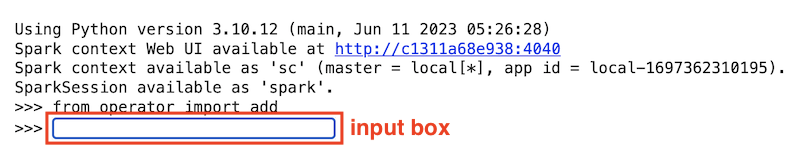

We are going to input the following lines in the PySpark shell:

```
from operator import add
lines = spark.read.text('don_quixote.txt').rdd.map(lambda r: r[0])
counts = lines.flatMap(lambda x: x.split(' ')).map(lambda x: (x, 1)) .reduceByKey(add)                     
                        
output = counts.collect()
for (word, count) in output[:10]: # print just first 10 lines of output
  print("%s: %i" % (word, count))
```

To exit the PySpark shell either enter

`quit()`

or interrupt the cell execution.

In [ ]:
# uncomment the next line for running the interactive PySpark shell
#!pyspark

Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2024-02-19 23:35:17 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.5.0
      /_/

Using Python version 3.10.12 (main, Nov 20 2023 15:14:05)
Spark context Web UI available at http://037f9bd9d890:4040
Spark context available as 'sc' (master = local[*], app id = local-1708385718791).
SparkSession available as 'spark'.
>>> from operator import add
>>> lines = spark.read.text('don_quixote.txt').rdd.map(lambda r: r[0])
>>> counts = lines.flatMap(lambda x: x.split(' ')).map(lambda x: (x, 1)) .reduceByKey(add) 
>>> 

## The PySpark kernel

If you want to run PySpark interactively in a Jupyter environment, you can install the [PySpark kernel](https://pypi.org/project/pyspark-kernel/).


## A note on real-time versus batch jobs

My unpretentious prompt for ChatGPT:

“*Write something about real-time versus batch jobs in the context of Hadoop Spark. Big Data jobs are inherently batch jobs because they run more longer than the time required for meaningful interaction. On the other hand, people want to interact with the Spark interactively (jupyter notebooks, pyspark shell) so there's this "clash of cultures" between real-time vs. interactive*”

To which ChatGPT 3.5 replied:



In [ ]:
# @title
from IPython.core.display import HTML
HTML("""

<div style="background-color:rgb(16, 163, 127,.2);border:2px solid rgb(16, 163, 127,.3);padding:3px;">
<svg fill="none" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 320 320"  style="width:32px;height:32px;">
 <g fill="currentColor">
  <path d="m297.06 130.97c7.26-21.79 4.76-45.66-6.85-65.48-17.46-30.4-52.56-46.04-86.84-38.68-15.25-17.18-37.16-26.95-60.13-26.81-35.04-.08-66.13 22.48-76.91 55.82-22.51 4.61-41.94 18.7-53.31 38.67-17.59 30.32-13.58 68.54 9.92 94.54-7.26 21.79-4.76 45.66 6.85 65.48 17.46 30.4 52.56 46.04 86.84 38.68 15.24 17.18 37.16 26.95 60.13 26.8 35.06.09 66.16-22.49 76.94-55.86 22.51-4.61 41.94-18.7 53.31-38.67 17.57-30.32 13.55-68.51-9.94-94.51zm-120.28 168.11c-14.03.02-27.62-4.89-38.39-13.88.49-.26 1.34-.73 1.89-1.07l63.72-36.8c3.26-1.85 5.26-5.32 5.24-9.07v-89.83l26.93 15.55c.29.14.48.42.52.74v74.39c-.04 33.08-26.83 59.9-59.91 59.97zm-128.84-55.03c-7.03-12.14-9.56-26.37-7.15-40.18.47.28 1.3.79 1.89 1.13l63.72 36.8c3.23 1.89 7.23 1.89 10.47 0l77.79-44.92v31.1c.02.32-.13.63-.38.83l-64.41 37.19c-28.69 16.52-65.33 6.7-81.92-21.95zm-16.77-139.09c7-12.16 18.05-21.46 31.21-26.29 0 .55-.03 1.52-.03 2.2v73.61c-.02 3.74 1.98 7.21 5.23 9.06l77.79 44.91-26.93 15.55c-.27.18-.61.21-.91.08l-64.42-37.22c-28.63-16.58-38.45-53.21-21.95-81.89zm221.26 51.49-77.79-44.92 26.93-15.54c.27-.18.61-.21.91-.08l64.42 37.19c28.68 16.57 38.51 53.26 21.94 81.94-7.01 12.14-18.05 21.44-31.2 26.28v-75.81c.03-3.74-1.96-7.2-5.2-9.06zm26.8-40.34c-.47-.29-1.3-.79-1.89-1.13l-63.72-36.8c-3.23-1.89-7.23-1.89-10.47 0l-77.79 44.92v-31.1c-.02-.32.13-.63.38-.83l64.41-37.16c28.69-16.55 65.37-6.7 81.91 22 6.99 12.12 9.52 26.31 7.15 40.1zm-168.51 55.43-26.94-15.55c-.29-.14-.48-.42-.52-.74v-74.39c.02-33.12 26.89-59.96 60.01-59.94 14.01 0 27.57 4.92 38.34 13.88-.49.26-1.33.73-1.89 1.07l-63.72 36.8c-3.26 1.85-5.26 5.31-5.24 9.06l-.04 89.79zm14.63-31.54 34.65-20.01 34.65 20v40.01l-34.65 20-34.65-20z"></path>
  </svg>
Real-time versus batch processing is a fundamental consideration in the context of Hadoop and Spark, especially when dealing with Big Data. These two paradigms have different use cases and approaches, and they often come into conflict when it comes to balancing the need for real-time responsiveness and interactive exploration of data.
<h3>Batch Processing:</h3>
<p>
Batch processing is the traditional way of handling data in large-scale analytics and data processing tasks. In this approach, data is collected, stored, and processed in discrete chunks or batches. Hadoop MapReduce, for example, is a batch processing framework. In this paradigm, data is collected over a period, and then a job is triggered to process the accumulated data in one go.
<p>
Advantages of batch processing in the context of Big Data include:
<p>
<ol>
<li><h4>Efficiency:</h4> Batch processing is highly efficient for processing large volumes of data, as it allows for optimizations and resource allocation over the entire dataset.
<li><h4>Scalability:</h4> Batch jobs can be scaled horizontally to handle massive amounts of data by adding more computing resources.
<li><h4>Robustness:</h4> Batch jobs are fault-tolerant; if a node fails during processing, the job can be re-executed without loss of data.
</ol>
<p>
However, there are some limitations with batch processing, particularly in the context of Spark:
<ul>
<li></h4>Latency: Batch processing is not suitable for real-time or interactive scenarios. It takes time to accumulate and process data, making it unsuitable for applications where low-latency responses are required.
<li></h4>Iterative Analysis: In interactive data exploration and iterative analysis, users need quick feedback, which is not feasible in a batch processing paradigm.
</ul>
<h3>Real-time Processing:</h3>
Real-time processing, on the other hand, aims to provide immediate responses to data as it arrives. Apache Spark Streaming is an example of a real-time processing framework. In this paradigm, data is processed incrementally as it's ingested, allowing for low-latency responses and real-time analytics.
<p>
Advantages of real-time processing include:
<p>
<ol>
<li><h4>Low Latency:</h4> Real-time processing is suitable for applications where low-latency responses are essential, such as fraud detection, recommendation systems, and monitoring.
<li><h4>Interactive Exploration:</h4> It enables interactive exploration of data, making it suitable for use in Jupyter notebooks or Spark shells where data scientists and analysts want to explore data interactively.
</ol>
<p>
However, there are trade-offs with real-time processing:
<ul>
<li><h4>Scalability and Efficiency:</h4> Real-time processing may be less efficient for processing large historical datasets. It focuses on real-time events and may not be the best choice for big, batch-oriented data.
<li><h4>Complexity:</h4> Real-time systems are often more complex to set up and manage compared to batch processing.
</ul>
The "clash of cultures" between real-time and interactive data processing in the context of Spark can be mitigated by using hybrid approaches. For example, you can use Spark Streaming for real-time processing and periodically store processed data for batch analysis. This allows you to balance low-latency interactions with the need for in-depth batch analysis.
<p>
In summary, the choice between real-time and batch processing in the context of Hadoop Spark depends on your specific use case and requirements. While Big Data jobs may often lean towards batch processing due to their data volume, it's crucial to consider the need for real-time responsiveness and interactive exploration and find a suitable balance between the two paradigms to meet the demands of modern data analytics.
</div>
""")

Me:

“*One should keep in mind that basically all Hadoop Spark jobs are batch jobs. Interactive tools make sense for small jobs with a limited amount of data.
Another topic is interactive monitoring of jobs (Web UIs).*”



In [ ]:
# @title
from IPython.core.display import HTML
HTML("""

<div style="background-color:rgb(16, 163, 127,.2);border:2px solid rgb(16, 163, 127,.3);padding:3px;">
<svg fill="none" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 320 320"  style="width:32px;height:32px;">
 <g fill="currentColor">
  <path d="m297.06 130.97c7.26-21.79 4.76-45.66-6.85-65.48-17.46-30.4-52.56-46.04-86.84-38.68-15.25-17.18-37.16-26.95-60.13-26.81-35.04-.08-66.13 22.48-76.91 55.82-22.51 4.61-41.94 18.7-53.31 38.67-17.59 30.32-13.58 68.54 9.92 94.54-7.26 21.79-4.76 45.66 6.85 65.48 17.46 30.4 52.56 46.04 86.84 38.68 15.24 17.18 37.16 26.95 60.13 26.8 35.06.09 66.16-22.49 76.94-55.86 22.51-4.61 41.94-18.7 53.31-38.67 17.57-30.32 13.55-68.51-9.94-94.51zm-120.28 168.11c-14.03.02-27.62-4.89-38.39-13.88.49-.26 1.34-.73 1.89-1.07l63.72-36.8c3.26-1.85 5.26-5.32 5.24-9.07v-89.83l26.93 15.55c.29.14.48.42.52.74v74.39c-.04 33.08-26.83 59.9-59.91 59.97zm-128.84-55.03c-7.03-12.14-9.56-26.37-7.15-40.18.47.28 1.3.79 1.89 1.13l63.72 36.8c3.23 1.89 7.23 1.89 10.47 0l77.79-44.92v31.1c.02.32-.13.63-.38.83l-64.41 37.19c-28.69 16.52-65.33 6.7-81.92-21.95zm-16.77-139.09c7-12.16 18.05-21.46 31.21-26.29 0 .55-.03 1.52-.03 2.2v73.61c-.02 3.74 1.98 7.21 5.23 9.06l77.79 44.91-26.93 15.55c-.27.18-.61.21-.91.08l-64.42-37.22c-28.63-16.58-38.45-53.21-21.95-81.89zm221.26 51.49-77.79-44.92 26.93-15.54c.27-.18.61-.21.91-.08l64.42 37.19c28.68 16.57 38.51 53.26 21.94 81.94-7.01 12.14-18.05 21.44-31.2 26.28v-75.81c.03-3.74-1.96-7.2-5.2-9.06zm26.8-40.34c-.47-.29-1.3-.79-1.89-1.13l-63.72-36.8c-3.23-1.89-7.23-1.89-10.47 0l-77.79 44.92v-31.1c-.02-.32.13-.63.38-.83l64.41-37.16c28.69-16.55 65.37-6.7 81.91 22 6.99 12.12 9.52 26.31 7.15 40.1zm-168.51 55.43-26.94-15.55c-.29-.14-.48-.42-.52-.74v-74.39c.02-33.12 26.89-59.96 60.01-59.94 14.01 0 27.57 4.92 38.34 13.88-.49.26-1.33.73-1.89 1.07l-63.72 36.8c-3.26 1.85-5.26 5.31-5.24 9.06l-.04 89.79zm14.63-31.54 34.65-20.01 34.65 20v40.01l-34.65 20-34.65-20z"></path>
  </svg>
You make a valid point that the fundamental nature of Hadoop Spark jobs is indeed batch processing. While Spark can process data in near real-time using components like Spark Streaming and Structured Streaming, the core Spark processing engine itself operates on data in batches. This batch-oriented nature is rooted in Spark's lineage to the Hadoop MapReduce framework.
<p>
Interactive tools, such as Jupyter notebooks and Spark shells, are most effective for exploratory data analysis and iterative development when working with relatively small subsets of data. These tools allow data scientists and analysts to interactively explore and manipulate data without the need for long-running batch jobs. However, they might not be well-suited for large-scale data processing and analysis.
<p>
Interactive monitoring of Spark jobs is essential for understanding how batch jobs are progressing and diagnosing any issues that may arise during their execution. The Spark Web UIs provide valuable insights into the status of Spark applications, jobs, stages, and tasks. These monitoring tools help users track the progress of their batch jobs, identify bottlenecks, optimize resource utilization, and troubleshoot performance problems.
<p>
Some key aspects of interactive monitoring in Spark include:
<ol>
<li><h4>Spark Application UI:</h4>
This web interface provides an overview of the entire Spark application, including information on job progress, task details, and resource utilization.
<li><h4>Spark Job and Stage UIs:</h4>
These interfaces allow users to drill down into specific jobs and stages within an application, providing details on task execution and performance metrics.
<li><h4>Streaming UI:</h4>
When working with Spark Streaming or Structured Streaming, this UI provides insights into real-time data processing, showing statistics on processing rates and latencies.
<li><h4>Event Logs:</h4>
Spark event logs can be invaluable for post-mortem analysis, and they can be accessed through the Web UIs.
</ol>
Interactive monitoring is crucial for maintaining the health and performance of Spark applications, especially in larger, more complex batch jobs. It allows users to identify issues and bottlenecks as they arise and make adjustments or optimizations in real-time.
<p>
In summary, it's important to recognize that while Spark jobs are primarily batch-oriented, interactive tools and monitoring capabilities play a significant role in facilitating the development, debugging, and exploration of data. The choice between batch and real-time processing should be based on the specific requirements of your use case, while also considering the need for interactive tools and monitoring to effectively manage and troubleshoot Spark applications.
  </div>
""")

# Monitor your job in the Web UI

Spark provides a Web UI where one can visualize apps' progress.

We are going to open the Web UI in the browser using Google Colab's [`output`](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=6Ugsim80WVuq) library.

Sparks's Web UI runs on port 4040. First set up the port forwarding.

In [ ]:
if IN_COLAB:
  from google.colab import output
  output.serve_kernel_port_as_window(4040, path='/jobs/index.html')

<IPython.core.display.Javascript object>

The Web UI is only available while the job is running so if you click on the link above now you will get an error message.

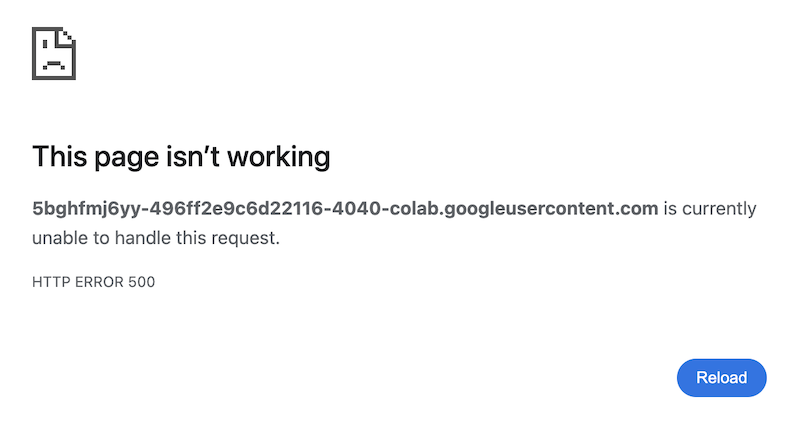

Start a PySpark job and reload the page. We are going to start the `pi.py` example with $100$ iterations.

But first set the log level to "warn".

In [ ]:
%%bash
# sed -i changes in-place
sed -i 's/rootLogger.level =.*/rootLogger.level = warn/' $SPARK_HOME/conf/log4j2.properties
cat $SPARK_HOME/conf/log4j2.properties

status = warn

appender.console.type = Console
appender.console.name = STDOUT
appender.console.target = SYSTEM_ERR

rootLogger.level = warn
rootLogger.appenderRef.stdout.ref = STDOUT

# formatting
appender.console.layout.type = PatternLayout
appender.console.layout.pattern = %d{yyyy-MM-dd HH:mm:ss} %-5p %c{1}:%L - %m%n


In [ ]:
!cp $SPARK_HOME/examples/src/main/python/pi.py ./
!spark-submit pi.py 100

2024-02-19 23:36:56 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Pi is roughly 3.141240


In [ ]:
if IN_COLAB:
  output.serve_kernel_port_as_window(4040, path='/jobs/index.html')

<IPython.core.display.Javascript object>

Now in the Web UI you can visualize the progress of your job (but only while it's running!).

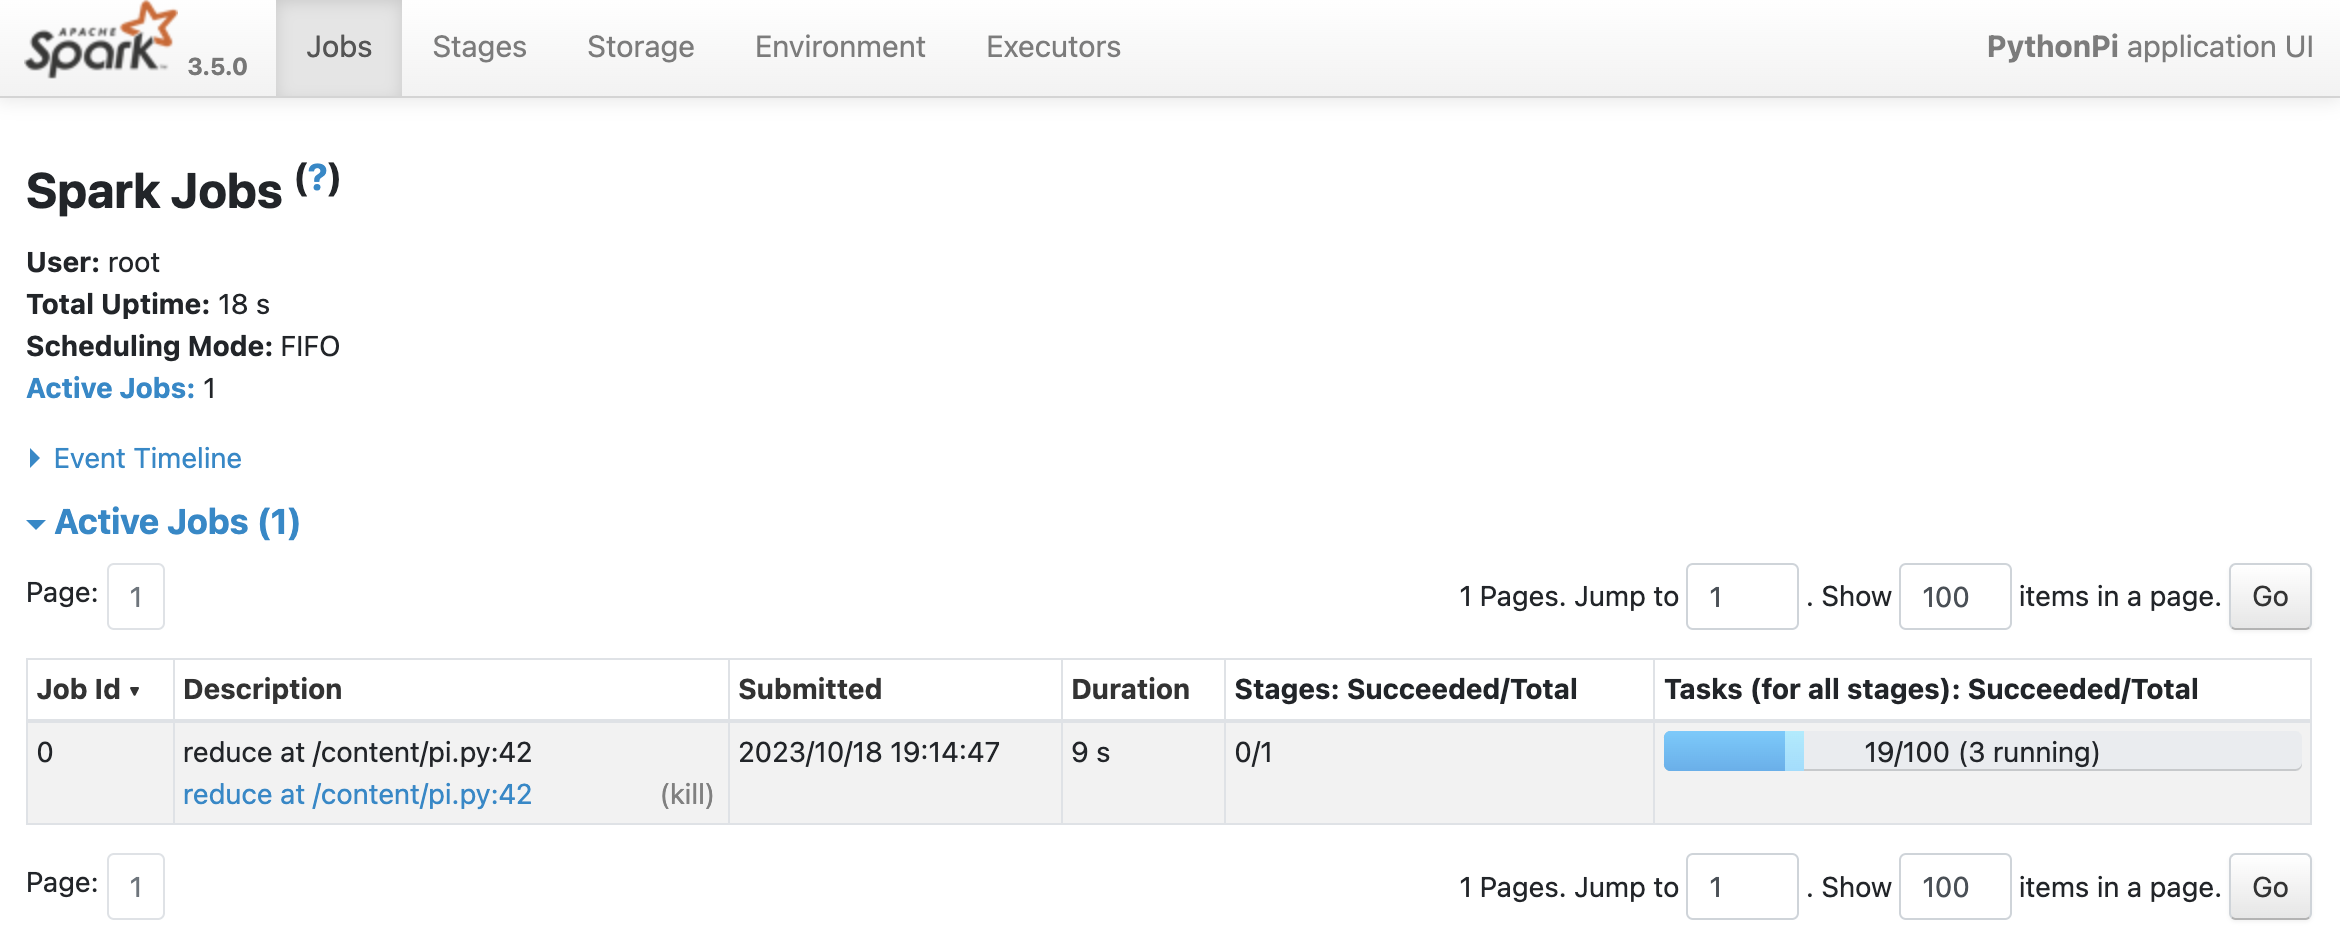

# Start the History Server

The History server is useful for reviewing jobs after they are completed.

The server can be started with the script `start-history-server.sh` located in the `sbin` directory of the PySpark installation folder (see also [Viewing After the Fact](https://spark.apache.org/docs/latest/monitoring.html#viewing-after-the-fact) in the Apache Spark documentation).

The History Server requires the property `spark.eventLog.enabled` in Spark set to `true` and `spark.eventLog.dir` to be the file where event logs are to be found (by default the regular file `file:/tmp/spark-events`).

The History Server runs as a background process thus when started it will not block the whole notebook.

In [ ]:
!$SPARK_HOME/sbin/start-history-server.sh |tee start_history_server.log

starting org.apache.spark.deploy.history.HistoryServer, logging to /usr/local/lib/python3.10/dist-packages/pyspark/logs/spark--org.apache.spark.deploy.history.HistoryServer-1-037f9bd9d890.out


Extract the History Server's log filename and look at the History Server's log.

In [ ]:
%%bash --no-raise-error
HISTORY_SERVER_LOG=$(cut -d' ' -f5 start_history_server.log)
echo $HISTORY_SERVER_LOG
cat $HISTORY_SERVER_LOG

/usr/local/lib/python3.10/dist-packages/pyspark/logs/spark--org.apache.spark.deploy.history.HistoryServer-1-037f9bd9d890.out
Spark Command: /usr/lib/jvm/java-11-openjdk-amd64/bin/java -cp /usr/local/lib/python3.10/dist-packages/pyspark/conf/:/usr/local/lib/python3.10/dist-packages/pyspark/jars/* -Xmx1g org.apache.spark.deploy.history.HistoryServer
2024-02-19 23:37:18 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


You should see a line that looks like this:

  `Bound HistoryServer to 0.0.0.0, and started at http://eb8ea65339ee:18080`

This means that the History Server can be reached at port $18080$ from the local host.

Let us serve port 18080 using Google Colab's `output` library:

In [ ]:
if IN_COLAB:
  p = 18080
  output.serve_kernel_port_as_window(p)

<IPython.core.display.Javascript object>

## Create missing folder `/tmp/spark-events`

The log file also contain the line:

  `Exception in thread "main" java.io.FileNotFoundException: Log directory specified does not exist: file:/tmp/spark-events`

This prevented the server from starting, that's why the above link `https://localhost:18080/` has no content.

Since the missing folder `/tmp/spark-events` caused the History Server to crash, let us create it.

In [ ]:
!mkdir /tmp/spark-events

And now restart the server.

In [ ]:
%%bash --no-raise-error
# first stop it in case it's already running
$SPARK_HOME/sbin/stop-history-server.sh
$SPARK_HOME/sbin/start-history-server.sh |tee start_history_server.log
HISTORY_SERVER_LOG=$(cat start_history_server.log |awk '{print $NF}')
echo "History Server log:" $HISTORY_SERVER_LOG
cat $HISTORY_SERVER_LOG

stopping org.apache.spark.deploy.history.HistoryServer
starting org.apache.spark.deploy.history.HistoryServer, logging to /usr/local/lib/python3.10/dist-packages/pyspark/logs/spark--org.apache.spark.deploy.history.HistoryServer-1-037f9bd9d890.out
History Server log: /usr/local/lib/python3.10/dist-packages/pyspark/logs/spark--org.apache.spark.deploy.history.HistoryServer-1-037f9bd9d890.out
Spark Command: /usr/lib/jvm/java-11-openjdk-amd64/bin/java -cp /usr/local/lib/python3.10/dist-packages/pyspark/conf/:/usr/local/lib/python3.10/dist-packages/pyspark/jars/* -Xmx1g org.apache.spark.deploy.history.HistoryServer


Link for the History Server Web UI:

In [ ]:
if IN_COLAB:
  output.serve_kernel_port_as_window(18080)

<IPython.core.display.Javascript object>

This looks better now. If you click on the link `https://localhost:18080/` now (find the link above) you should get something like:

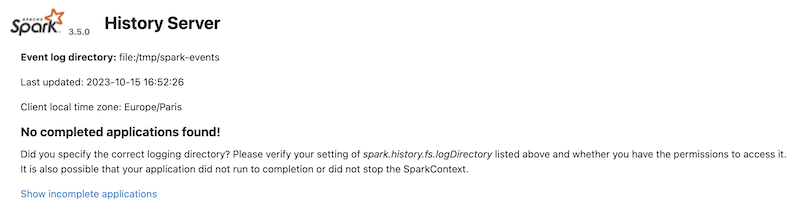

Let us submit an app to fill Spark's events directory.

In [ ]:
%%bash
spark-submit wordcount.py don_quixote.txt 1>out.txt 2>err.txt
head out.txt err.txt

==> out.txt <==
The: 846
Project: 80
Gutenberg: 23
eBook: 4
of: 12866
Don: 2541
Quixote: 1012
: 8413
This: 97
ebook: 2

==> err.txt <==
2024-02-19 23:37:26 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


There are still a couple of adjustments to be made in order to be able to see Spark's applications history.

The following two lined need to be added to `spark-defaults.conf` (see [Viewing After the Fact](https://spark.apache.org/docs/latest/monitoring.html#viewing-after-the-fact)):

  `spark.eventLog.enabled true`

   `spark.eventLog.dir file:/tmp/spark-events`

In [ ]:
%%bash
# create conf directory
# with the option -p mkdir won't complain if the folder already exists
mkdir -p $SPARK_HOME/conf

# populate log4j2.properties file
FILE=$SPARK_HOME/conf/spark-defaults.conf

# see https://spark.apache.org/docs/latest/monitoring.html#viewing-after-the-fact
cat> $FILE <<🙂
spark.eventLog.enabled true
spark.eventLog.dir file:/tmp/spark-events
🙂

Restart the server and re-run the app. The app should now write logs to the directory (`file:/tmp/spark-events`) that's being read by the History Server.

In [ ]:
%%bash --no-raise-error
# first stop it in case it's already running
$SPARK_HOME/sbin/stop-history-server.sh
$SPARK_HOME/sbin/start-history-server.sh |tee start_history_server.log
HISTORY_SERVER_LOG=$(cat start_history_server.log |awk '{print $NF}')
echo "History Server log:" $HISTORY_SERVER_LOG
spark-submit wordcount.py don_quixote.txt 1>out.txt 2>err.txt
head out.txt err.txt

stopping org.apache.spark.deploy.history.HistoryServer
starting org.apache.spark.deploy.history.HistoryServer, logging to /usr/local/lib/python3.10/dist-packages/pyspark/logs/spark--org.apache.spark.deploy.history.HistoryServer-1-037f9bd9d890.out
History Server log: /usr/local/lib/python3.10/dist-packages/pyspark/logs/spark--org.apache.spark.deploy.history.HistoryServer-1-037f9bd9d890.out
==> out.txt <==
The: 846
Project: 80
Gutenberg: 23
eBook: 4
of: 12866
Don: 2541
Quixote: 1012
: 8413
This: 97
ebook: 2

==> err.txt <==
2024-02-19 23:37:42 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Browsing the History Server

In the browser tab or window where the History Server is open you should now see (after reloading the page)


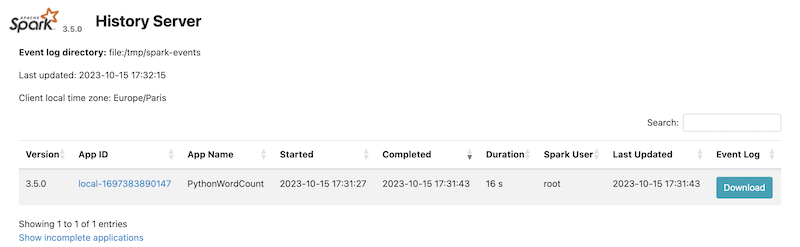

If you click on the App ID you get more details on the Wordcount app (you might have to click on the link twice if an error message shows up)

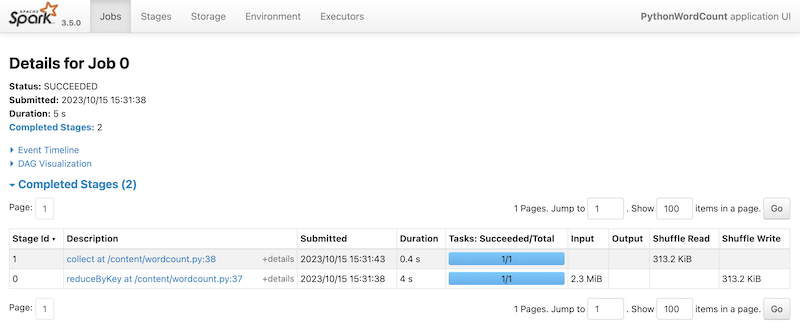

You can look at the steps of your app represented as a Directed Acyclic Graph (DAG)

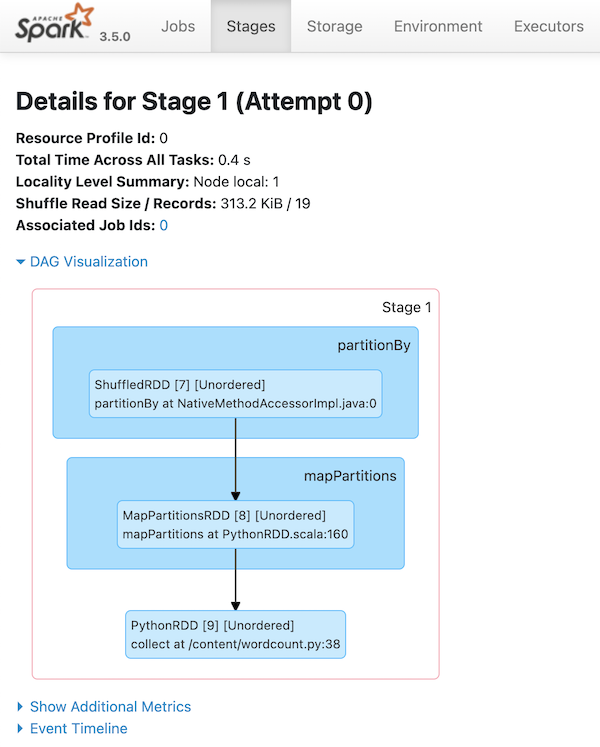

The "Environment" tab contains all the environment details of your app.

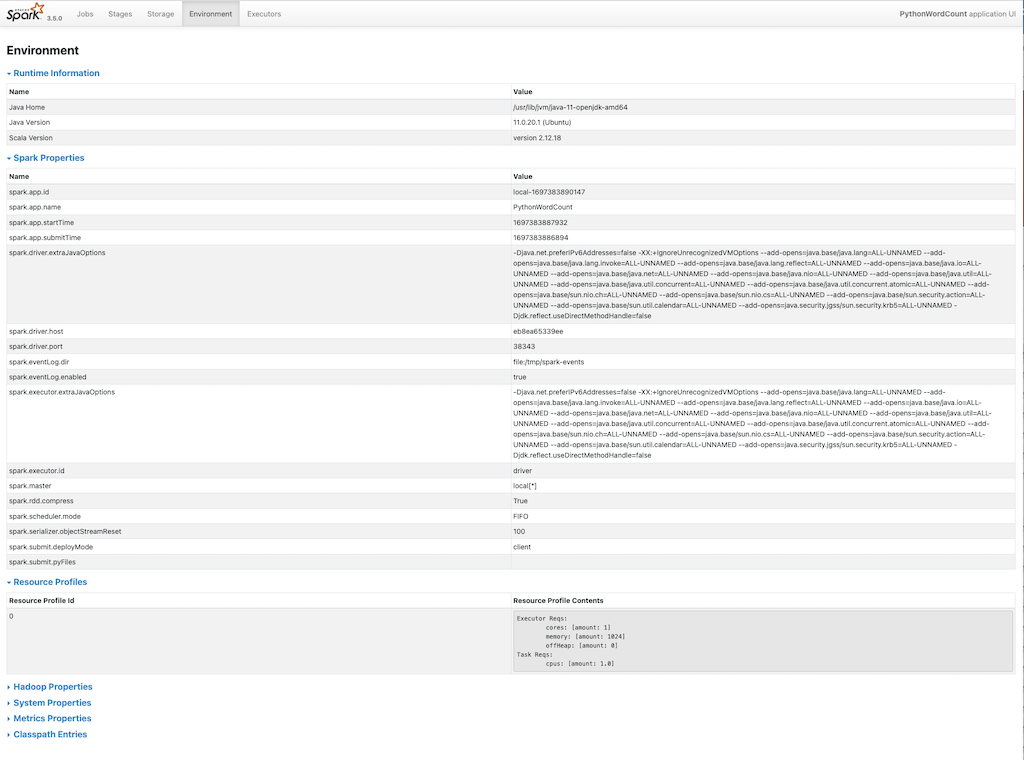

# Clean up Colab environment

This will allow you to re-run the whole notebook from the beginning starting from a clean PySpark installation (without Log4j2 configuration files and without a running History Server).

## Remove the `conf` folder

In order to reset the Colab environment to the initial state while keeping the PySpark installation, we are going to remove the `conf` folder.

In [ ]:
!rm -rf $SPARK_HOME/conf

## Stop the History Server

In [ ]:
!$SPARK_HOME/sbin/stop-history-server.sh

stopping org.apache.spark.deploy.history.HistoryServer
